# Purwadhika Capstone Project 2 : Data Analysis

In this project, I am taking a role as data analyst to analyze a certain dataset and the result should intended to help stakeholders in decision making.
<br>For this project, I have analyzed Online Retail dataset with the questions or goals for the analysis described below.

## Questions
1. Which warehouse block have the most problems in shipping delivery durations together with the method?
2. Is product importance affects on time delivery?
3. Is Cost of Product/Price affects on time delivery?
4. Do late deliveries affect both customer rating and customer care calls?

## Data
The dataset are records of an online retail customer which composed of:
<ol>
<li>ID: ID number of customer</li>
<li>Warehouse_block: Code of warehouse blocks used to store inventory, from A to E</li>
<li>Mode_of_shipment: Shipment method utilized by company, available methods are:</li>
    <ul>
    <li>Ship</li>
    <li>Flight</li>
    <li>Road</li>
    </ul>
<li>Customer_care_calls: Number of calls made by customer for inquiries of shipment</li>
<li>Customer_rating: Rating from customer, from 1 (lowest) to 5 (highest)</li>
<li>Cost_of_the_product: Cost of product in US Dollars</li>
<li>Prior_purchases: Number of prior purchases</li>
<li>Product_purchases: Importance of product categorized by company, composed of low, medium, high</li>
<li>Gender: Gender of customer</li>
<li>Discount_offered: Discount offered on that specific product</li>
<li>Weight_in_gms: The weight of product in grams</li>
<li>Reached.on.time: Coded in binary, 1 indicates the product has not arrived on time and 0 indicates product has arrived on time</li>
</ol>

## Libraries used in the Data Analysis

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import normaltest, chi2_contingency, pointbiserialr

## Data Overview

In [53]:
retail = pd.read_csv('Online Retail Shipping.csv')
retail

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [54]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [55]:
print('Retail dataset has',retail.shape,'rows and columns')

Retail dataset has (10999, 12) rows and columns


Based from both information presented by retail.info and retail.shape:

1. There are 10999 rows and 12 columns inside Online Retail Dataset.
2. All of the columns did not have missing or NaN values.
3. All columns which should have string data type (Warehouse_block, Mode_of_Shipment, Product_importance, Gender) have correct data type.
4. All columns which should have integer data type (ID, Customer_care_calls, Customer_rating, Prior purchases, Discount_offered, Weight_in_gms, Reached.on.Time) have correct data type.


In [56]:
pd.set_option('display.max_colwidth', None)
listItem = []
for column in retail.columns :
    listItem.append( [column, retail[column].nunique(), retail[column].unique()])


retailDescibe = pd.DataFrame(columns=['Column Name', 'Number of Unique Data', 'Unique Sample'], data=listItem)
retailDescibe

,Column Name,Number of Unique Data,Unique Sample
0,ID,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Warehouse_block,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,3,"[Flight, Ship, Road]"
3,Customer_care_calls,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198, 275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234, 266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169, 160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261, 202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185, 278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168, 265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237, 264, 248, 191, 146, 135, 98, 97, 114, 112, ...]"
6,Prior_purchases,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,3,"[low, medium, high]"
8,Gender,2,"[F, M]"
9,Discount_offered,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43, 45, 6, 36, 18, 38, 51, 2, 28, 24, 31, 61, 22, 4, 62, 16, 56, 15, 9, 40, 37, 41, 17, 64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57, 7, 35, 8, 5, 53, 55, 47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30]"


The values inside Discount_offered column is quite unclear in what terms the discount offered to customer. The discount could be in percentage or in US dollars.

### Changing Reached.on.Time_Y.N Values
Change the values inside Reached.on.Time_Y.N values from 0 (arrive on time ) into yes and 1 (did not arrive on time) into no in a copy of retail dataset, retaining the original data in retail variable.

Changing the values will make the data visualizations more readable as the values are in string of yes or no. If the values left in 0 and 1 in integer type, seaborn will treat the values as a range.

Below are the example of data visualization of Reached.on.Time_Y.N column in original state:

<function matplotlib.pyplot.show(close=None, block=None)>

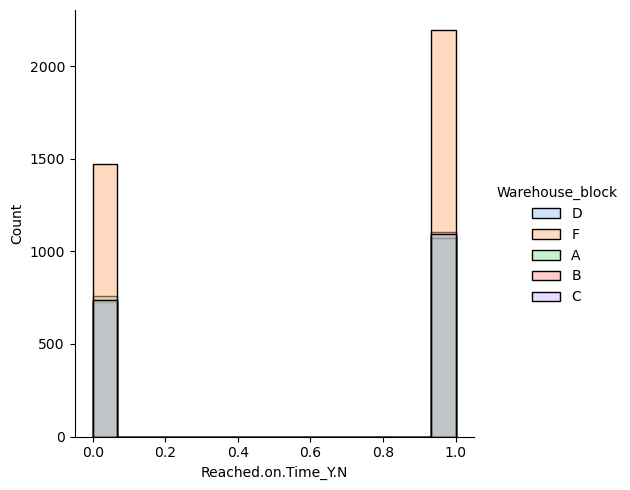

In [57]:
sns.displot(
    data = retail,
    x = 'Reached.on.Time_Y.N',
    hue = 'Warehouse_block',
    palette = 'pastel'
)
plt.show

In [58]:
retail_c = retail.copy()
retail_c['Reached.on.Time_Y.N'] = retail_c['Reached.on.Time_Y.N'].where(retail_c['Reached.on.Time_Y.N'] > 0,'yes')
retail_c['Reached.on.Time_Y.N'] = retail_c['Reached.on.Time_Y.N'].where(retail_c['Reached.on.Time_Y.N'] == 'yes','no')
retail_c

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,no
1,2,F,Flight,4,5,216,2,low,M,59,3088,no
2,3,A,Flight,2,2,183,4,low,M,48,3374,no
3,4,B,Flight,3,3,176,4,medium,M,10,1177,no
4,5,C,Flight,2,2,184,3,medium,F,46,2484,no
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,no
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,yes
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,yes
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,yes


Renaming the column Reached.on.Time_Y.N to Reached_on_time so the column have name that easier to type

In [59]:
retail_c = retail_c.rename(columns = {'Reached.on.Time_Y.N':'Reached_on_time'})

## Data Analysis

We need to take a look the amount of orders served by each Warehouse Block to determine the worst performing Block.

Total of Frequency of Orders per Warehouse Block : 
 Warehouse_block
A    1833
B    1833
C    1833
D    1834
F    3666
dtype: int64


Text(0.5, 1.0, 'Proportions of orders by each Warehouse Block')

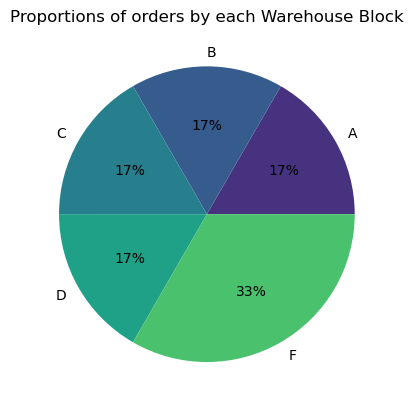

In [60]:
labels = retail_c['Warehouse_block'].sort_values().unique()
data = retail_c.value_counts(subset = 'Warehouse_block', ascending = True)
print('Total of Frequency of Orders per Warehouse Block :','\n',data)
plt.pie(data.to_numpy(), labels = labels, colors = sns.color_palette('viridis'), autopct = '%.0f%%')
plt.title('Proportions of orders by each Warehouse Block')

The table above shows Warehouse Block F served the 33% of the total orders in the dataset, so Warehouse F have the most potential to have orders which did not arrive on time.

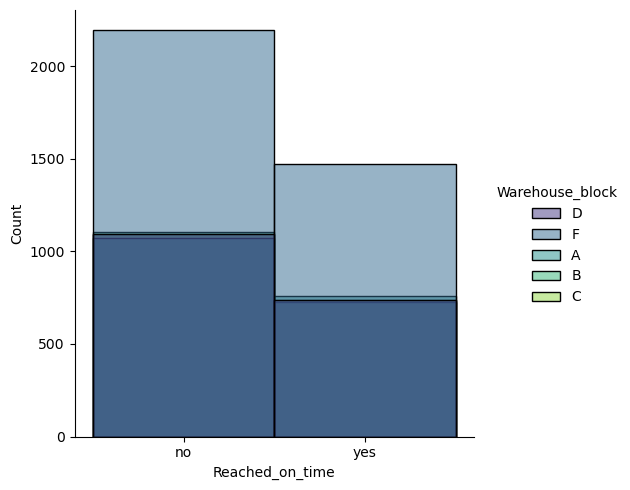

In [61]:
sns.displot(
    data = retail_c,
    x = 'Reached_on_time',
    hue = 'Warehouse_block',
    palette = 'viridis'
)


From the distribution chart above, the worst performing Warehouse is hard to determine as the color overlaps each other so the data needs to be delved further.

The chart shows the proportion between orders reached on time compared to orders late in delivery are skewed into late deliveries, further show in the table below:

In [62]:
on_time = retail_c.value_counts(subset = ['Warehouse_block','Reached_on_time'], sort = False).reset_index(name = 'frequency')
on_time

,Warehouse_block,Reached_on_time,frequency
0,A,no,1075
1,A,yes,758
2,B,no,1104
3,B,yes,729
4,C,no,1094
5,C,yes,739
6,D,no,1096
7,D,yes,738
8,F,no,2194
9,F,yes,1472


Text(0.5, 1.0, 'Frequency of Delivery Sorted by Warehouse Block')

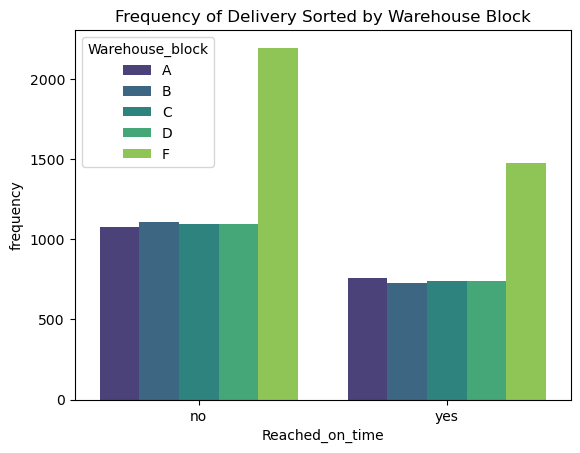

In [63]:
sns.barplot(
    data = on_time,
    y = 'frequency',
    x = 'Reached_on_time',
    hue = 'Warehouse_block',
    palette = 'viridis'
)
plt.title('Frequency of Delivery Sorted by Warehouse Block')


The barchart above shows that Warehouse Block F served the most order compared to other warehouses, but the most underperforming warehouse cannot be discerned from the chart so in further data exploration is required.

In [64]:
no = on_time[on_time['Reached_on_time'] == 'no'].reset_index(drop = True)
no

,Warehouse_block,Reached_on_time,frequency
0,A,no,1075
1,B,no,1104
2,C,no,1094
3,D,no,1096
4,F,no,2194


In [65]:
yes = on_time[on_time['Reached_on_time'] == 'yes'].reset_index(drop = True)
yes

,Warehouse_block,Reached_on_time,frequency
0,A,yes,758
1,B,yes,729
2,C,yes,739
3,D,yes,738
4,F,yes,1472


Splitting the frequency of on time deliveries and late deliveries into 2 tables show the majority of orders did not arrive on time.
<br>The ratio of each frequency sorted per Warehouse Block might give some insights.

In [66]:
ratio = yes.drop('Reached_on_time', axis = 1).copy()
ratio = ratio.rename(columns = {'frequency':'freq_of_on_time_delivery'})
ratio['freq_of_late_delivery'] = no['frequency'].copy()
ratio

,Warehouse_block,freq_of_on_time_delivery,freq_of_late_delivery
0,A,758,1075
1,B,729,1104
2,C,739,1094
3,D,738,1096
4,F,1472,2194


In [67]:
ratio['ratio_of_on_time_delivery'] = (ratio['freq_of_on_time_delivery'] / (ratio['freq_of_on_time_delivery'] + ratio['freq_of_late_delivery']))*100
ratio['ratio_of_late_delivery'] = 100 - ratio['ratio_of_on_time_delivery']
ratio


,Warehouse_block,freq_of_on_time_delivery,freq_of_late_delivery,ratio_of_on_time_delivery,ratio_of_late_delivery
0,A,758,1075,41.352973,58.647027
1,B,729,1104,39.770867,60.229133
2,C,739,1094,40.316421,59.683579
3,D,738,1096,40.239913,59.760087
4,F,1472,2194,40.152755,59.847245


The ratio calculation shows that all of the Warehouse Block are performing badly, majority of the orders are received late. The worst performing are Warehouse Block B with 60.23% of orders delivered late abeit the differences of ratio of other Warehouses quite slim.

The best performing Warehouse Block is Block A with 41.35% of the order delivered on time.

Let's investigate further which shipping method caused the orders to delivered late.

#### Distribution of missed delivery duration per Shipment Mode

Text(0.5, 1.0, 'Mode of Shipment per On Time Delivery Status')

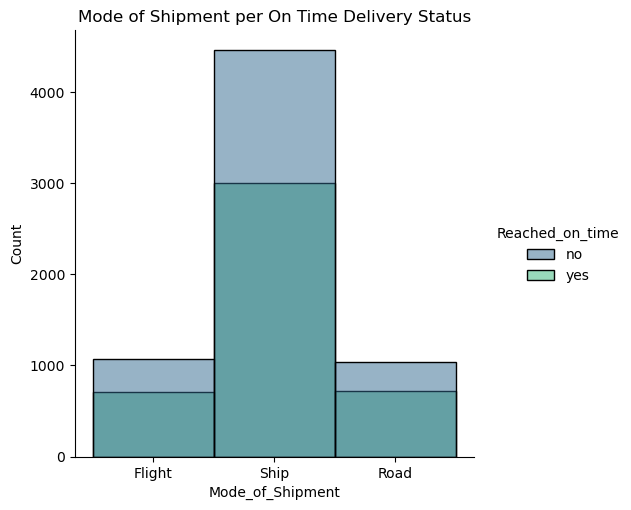

In [68]:
sns.displot(
    data = retail_c,
    x = 'Mode_of_Shipment',
    hue = 'Reached_on_time',
    palette = 'viridis'
)
plt.title('Mode of Shipment per On Time Delivery Status')

#### Distribution of Shipment Mode with Delivery Status

Text(0.5, 1.0, 'Mode Of Shipment per Product Importance')

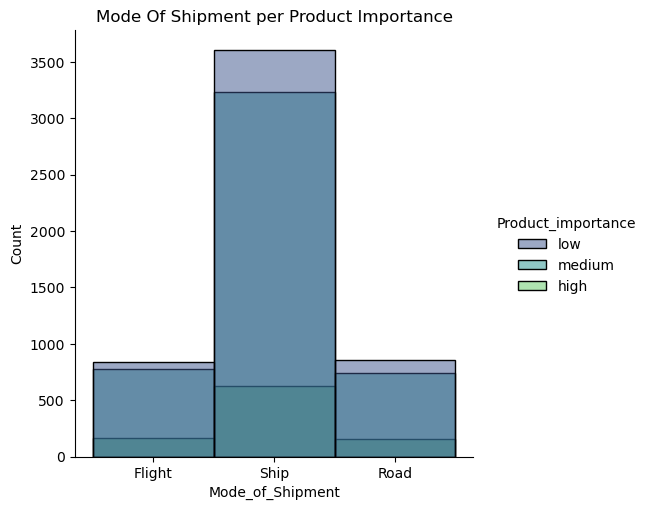

In [69]:
sns.displot(
    data = retail_c,
    x = 'Mode_of_Shipment',
    hue = 'Product_importance',
    palette = 'viridis'
)
plt.title('Mode Of Shipment per Product Importance')

In [70]:
warb = retail_c[retail_c['Warehouse_block'] == 'B'].copy()
warb = warb.drop(columns = {'Customer_care_calls','Customer_rating','Cost_of_the_Product','Product_importance','Prior_purchases','Gender','Discount_offered','Weight_in_gms'})
warb

,ID,Warehouse_block,Mode_of_Shipment,Reached_on_time
3,4,B,Flight,no
9,10,B,Flight,no
15,16,B,Flight,no
21,22,B,Ship,no
27,28,B,Ship,no
...,...,...,...,...
10971,10972,B,Flight,yes
10977,10978,B,Ship,yes
10983,10984,B,Ship,no
10989,10990,B,Ship,yes


Text(0.5, 1.0, 'Distribution Chart of Shipment Mode in Warehouse B')

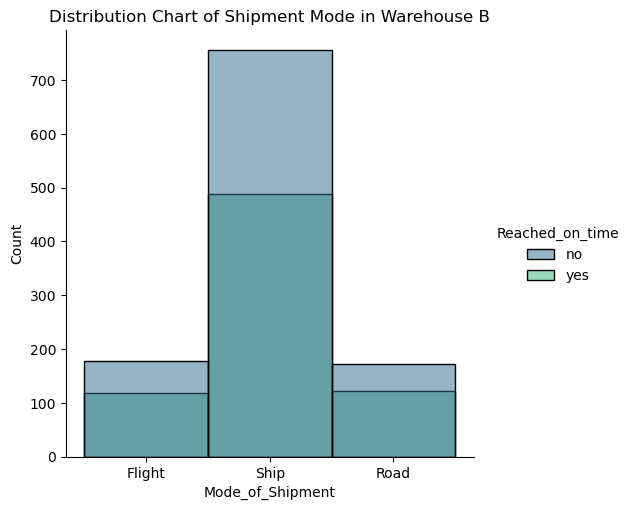

In [71]:
sns.displot(
    data = warb,
    x = 'Mode_of_Shipment',
    hue = 'Reached_on_time',
    palette = 'viridis'
)
plt.title('Distribution Chart of Shipment Mode in Warehouse B')

The distribution chart shows the most used shipment method is by sea/ship

In [72]:
shipB = warb.value_counts(subset = ['Warehouse_block','Reached_on_time','Mode_of_Shipment'], sort = False).reset_index(name = 'frequency')
shipB

,Warehouse_block,Reached_on_time,Mode_of_Shipment,frequency
0,B,no,Flight,177
1,B,no,Road,172
2,B,no,Ship,755
3,B,yes,Flight,119
4,B,yes,Road,122
5,B,yes,Ship,488


In [73]:
shipB2 = shipB[shipB['Reached_on_time'] == 'yes'].drop(columns = 'Reached_on_time').rename(columns = {'frequency':'freq_on_time'}).reset_index(drop = True)
shipB2

,Warehouse_block,Mode_of_Shipment,freq_on_time
0,B,Flight,119
1,B,Road,122
2,B,Ship,488


In [74]:
shipB3 = shipB[shipB['Reached_on_time'] == 'no'].drop(columns = 'Reached_on_time').rename(columns = {'frequency':'freq_late'}).reset_index(drop = True)
shipB3

,Warehouse_block,Mode_of_Shipment,freq_late
0,B,Flight,177
1,B,Road,172
2,B,Ship,755


In [75]:
shipfinal = shipB2.copy()
shipfinal['freq_late'] = shipB3['freq_late'].copy()
shipfinal['ratio_of_on_time'] = shipfinal['freq_on_time'] * 100 / (shipfinal['freq_on_time'] + shipfinal['freq_late'])
shipfinal['ratio_of_late'] = 100 - shipfinal['ratio_of_on_time']
shipfinal


,Warehouse_block,Mode_of_Shipment,freq_on_time,freq_late,ratio_of_on_time,ratio_of_late
0,B,Flight,119,177,40.202703,59.797297
1,B,Road,122,172,41.496599,58.503401
2,B,Ship,488,755,39.259855,60.740145


Most of the late deliveries happened with sea shipment method, compared to flight or land shipment. 

The data also shows the best performing method is land shipment (road) compared to other two methods.

Similar with comparison of late deliveries with Warehouse blocks, the margins between each method is quite small.

In [76]:
wara = retail_c[retail_c['Warehouse_block'] == 'A'].copy()
wara = wara.drop(columns = {'Customer_care_calls','Customer_rating','Cost_of_the_Product','Product_importance','Prior_purchases','Gender','Discount_offered','Weight_in_gms'})
shipA = wara.value_counts(subset = ['Warehouse_block','Reached_on_time','Mode_of_Shipment'], sort = False).reset_index(name = 'frequency')
shipA2 = shipA[shipA['Reached_on_time'] == 'yes'].drop(columns = 'Reached_on_time').rename(columns = {'frequency':'freq_on_time'}).reset_index(drop = True)
shipA3 = shipA[shipA['Reached_on_time'] == 'no'].drop(columns = 'Reached_on_time').rename(columns = {'frequency':'freq_late'}).reset_index(drop = True)
shipfinal = shipA2.copy()
shipfinal['freq_late'] = shipA3['freq_late'].copy()
shipfinal['ratio_of_on_time'] = shipfinal['freq_on_time'] * 100 / (shipfinal['freq_on_time'] + shipfinal['freq_late'])
shipfinal['ratio_of_late'] = 100 - shipfinal['ratio_of_on_time']
shipfinal


,Warehouse_block,Mode_of_Shipment,freq_on_time,freq_late,ratio_of_on_time,ratio_of_late
0,A,Flight,123,174,41.414141,58.585859
1,A,Road,126,168,42.857143,57.142857
2,A,Ship,509,733,40.982287,59.017713


Checking the deliveries made by Warehouse Block A, as Block A is the best performing Block also shows the similar results.

The worst performing delivery method is by ship and the best is land delivery.

### Checking the Relationship of Product_importance with Delivery Status

Product_importance and Delivery status are both categorical data so chi-square test should be used to examine the relationship for both variables.

The first step is to aggregate the frequency into a DataFrame with counts of both on time and late delivery compared with each of level of Product_importance.

Hypothesis for the chi-square test are:
    <ul>
    <li>H0: Product importance on each product are not related or have influence on time delivery status</li>
    <li>H1: Product importance on each product related or have influence on time delivery status</li>
    </ul>

In [77]:
freqcount  = retail_c.value_counts(subset = ['Product_importance','Reached_on_time'], sort = False).reset_index(name ='count')
freqcount = freqcount.pivot(index = 'Reached_on_time', columns = 'Product_importance', values = 'count')
freqcount

Product_importance,high,low,medium
Reached_on_time,,,
no,616,3140,2807
yes,332,2157,1947


In [78]:
chi2 = freqcount.values.tolist()
chi2

[[616, 3140, 2807], [332, 2157, 1947]]

In [79]:
stat, p , dof, expected = chi2_contingency(chi2)
alpha = 0.05
print('P-value is ' + str(p))
if p <= alpha:
    print('Dependent variable, reject H0')
else:
    print('Independent variable, H0 holds')

P-value is 0.0022303831047450844
Dependent variable, reject H0


As the chi-square test above rejects H0, Product importance of each product relate or have influence on delivery status.

Unfortunately as this is nonparametric test, the relationship between both variable cannot be defined clearly.

Further research with more detailed dataset is required to delve the relationship.

### Checking the Relationship of Cost_of_product with Delivery Status

Cost_of_product is a numerical variable, so the distribution of the values inside must be checked.

Parametric statistical test regarding numerical variable requires the data to follow normal distribution in order to proceed.

Text(0.5, 1.0, 'Data Distribution of Cost_of_Product')

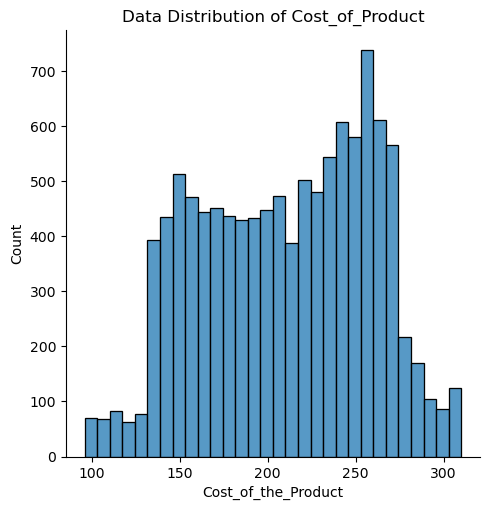

In [80]:
sns.displot(
    data = retail_c,
    x = 'Cost_of_the_Product'
)
plt.title('Data Distribution of Cost_of_Product')

The distribution of Cost_of_the_Product in the plot above is close to normal distribution. <br>
In order to make sure, the values of Cost_of_the_Product can be tested for normality.

In [81]:
alpha = 0.05
k2, p = normaltest(retail_c['Cost_of_the_Product'])
if p < alpha:
    print('The distribution of Cost_of_the_Product is normal distribution')
else:
    print('The distribution of Cost_of_the_Product is not normal distribution')

The distribution of Cost_of_the_Product is normal distribution


In order to check the correlation between Cost_of_the_Product with Delivery Status, both variables can be tested with point-biserial test.

Hypotesis in this test:
<ul>
<li>H0: There is no correlation between Cost_of_the_Product with Delivery Status (Reached.on.Time_Y.N)</li>
<li>H1: There is correlation between Cost_of_the_Product with Delivery Status (Reached.on.Time_Y.N)</li>
</ul>

In [82]:
alpha = 0.05
biserial = pointbiserialr(retail_c['Cost_of_the_Product'],retail['Reached.on.Time_Y.N'])
if biserial[1] < alpha:
    print('Reject H0, Correlation between Cost_of_the_Product with Delivery Status (Reached.on.Time_Y.N) exists')
    print(f'Correlation between Cost_of_the_Product with Delivery Status is: {biserial[0]:.2f}')
else:
    print('Reject H1, There is no correlation between Cost_of_the_Product with Delivery Status (Reached.on.Time_Y.N)')

Reject H0, Correlation between Cost_of_the_Product with Delivery Status (Reached.on.Time_Y.N) exists
Correlation between Cost_of_the_Product with Delivery Status is: -0.07


The test show that Cost_of_the_Product have weak negative correlation with Delivery Status.

Point-biserial test requires the binary variable as input so the test made with original Reached.on.Time_Y.N data with 0 as on time delivery and 1 as late delivery.

It can be concluded that higher the product price, the delivery status tends to skew towards on time delivery.

### Checking the Relationship of Customer_rating with Delivery Status

Customer_rating is a ordinal variable composed from 1-5 and Delivery status is binary variable then chi-square test is used to check the relatioship between variables.

Hypothesis for the chi-square test are:
    <ul>
    <li>H0: Customer_rating on each product are not related or influenced on time delivery status</li>
    <li>H1: Customer_rating on each product related or influenced on time delivery status</li>
    </ul>

In [83]:
freqcount  = retail_c.value_counts(subset = ['Customer_rating','Reached_on_time'], sort = False).reset_index(name ='count')
freqcount = freqcount.pivot(index = 'Reached_on_time', columns = 'Customer_rating', values = 'count')
freqcount

Customer_rating,1,2,3,4,5
Reached_on_time,,,,,
no,1313,1273,1357,1303,1317
yes,922,892,882,886,854


In [84]:
chi2 = freqcount.values.tolist()
chi2

[[1313, 1273, 1357, 1303, 1317], [922, 892, 882, 886, 854]]

In [85]:
stat, p , dof, expected = chi2_contingency(chi2)
alpha = 0.05
print('P-value is ' + str(p))
if p <= alpha:
    print('Dependent variable, reject H0')
else:
    print('Independent variable, H0 holds')

P-value is 0.5249236018493662
Independent variable, H0 holds


Chi-Square test result shows that both Customer_rating and Delivery status are independent variables so there are no relationship between both variables.

Customer_rating is not influenced by delivery status, either late or on time will not affect customer rating.

### Checking the Relationship of Customer_rating with Customer_care_calls
As Customer_care_calls are numerical variable, the distribution of the values inside must be checked.

Parametric statistical test regarding numerical variable requires the data to follow normal distribution in order to proceed.

Text(0.5, 1.0, 'Data Distribution of Customer_care_calls')

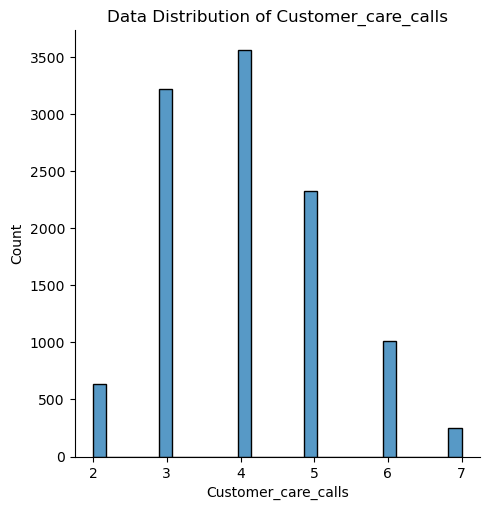

In [86]:
sns.displot(
    data = retail_c,
    x = 'Customer_care_calls'
)
plt.title('Data Distribution of Customer_care_calls')

The data distribution of Customer_care_calls looks close to normal distribution.<br>
In order to make sure the data distributed normally, the data will be tested with normaltest function.

In [87]:
alpha = 0.05
k2, p = normaltest(retail_c['Customer_care_calls'])
if p < alpha:
    print('The distribution of Cost_of_the_Product is normal distribution')
else:
    print('The distribution of Cost_of_the_Product is not normal distribution')

The distribution of Cost_of_the_Product is normal distribution


The normal test shows that Customer_care_calls are indeed distributed normally, so proceed to the statistical test.

Conditions are similar when analyzing Cost_of_the_Product so the test used to check the relationship is point-biserial test.

Hypotesis in this test are:
<ul>
<li>H0: There is no correlation between Customer_care_calls with Customer_rating</li>
<li>H1: There is correlation between Customer_care_calls with Customer_rating</li>
</ul>

In [88]:
alpha = 0.05
biserial = pointbiserialr(retail_c['Customer_care_calls'],retail['Customer_rating'])
if biserial[1] < alpha:
    print('Reject H0, Correlation between Customer_care_calls with Customer_rating exists')
    print(f'Correlation between Customer_care_calls with Customer_rating is: {biserial[0]:.2f}')
else:
    print('Reject H1, There is no correlation between Customer_care_calls with Customer_rating')

Reject H1, There is no correlation between Customer_care_calls with Customer_rating


Point-biserial test shows no correlation between Customer_care_calls with Customer_rating so both variables are independent from each other.

## Conclusion

1. The worst performing Warehouse Block is Block B with the most worst delivery method is by ship.
2. Product importance level has influence to delivery result but the details cannot be explained in this dataset.
3. Product price has weak negative correlation with delivery status.
4. Customer rating and delivery status are independent from each other.
5. Customer care calls and customer rating are independent from each other.